# Predicting flight delays

This notebook is a start to predict the delays of flights from a 2015 dataset

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [3]:
#macbook
#airlines = pd.read_csv(os.path.abspath("airlines.csv"))
#airports = pd.read_csv(os.path.abspath("airports.csv"))
#flights = pd.read_csv(os.path.abspath("flights_train.csv"))

In [4]:
airlines = pd.read_csv("data\\airlines.csv")
airports = pd.read_csv("data\\airports.csv")
flights_original = pd.read_csv("data\\flights_train.csv")
flights = flights_original
flights.

## Inspecting the data

 the amount of delays in the set is: 895684 
 the amount of no delays in the set is: 1430022

In [5]:
flights_original.head()

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,21.0,15.0,205.0,194.0,169.0,1448,430,-22.0
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,12.0,14.0,280.0,279.0,263.0,2330,750,-9.0
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,16.0,34.0,286.0,293.0,266.0,2296,806,5.0
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,15.0,30.0,285.0,281.0,258.0,2342,805,-9.0
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,11.0,35.0,235.0,215.0,199.0,1448,320,-21.0


## Making some extra variables that might be nice

In [6]:
flights['est_elapsed_delay']= flights['ELAPSED_TIME'] - flights['SCHEDULED_TIME']

## dummies

First we create dummies for airlines and airports

In [7]:
flights = flights_original
# airlines
dummies_airline = pd.get_dummies(flights.AIRLINE, prefix = "airline")
# origins
dummies_oriport = pd.get_dummies(flights.ORIGIN_AIRPORT, prefix = "oriport")
# destinations
dummies_destiport = pd.get_dummies(flights.DESTINATION_AIRPORT, prefix = "destiport")
flights = pd.concat([flights, dummies_airline, dummies_oriport, dummies_destiport], axis =1)
flights.head

<bound method NDFrame.head of               id  YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER  \
0              0  2015      1    1            4      AS             98   
1              1  2015      1    1            4      AA           2336   
2              2  2015      1    1            4      US            840   
3              3  2015      1    1            4      AA            258   
4              4  2015      1    1            4      AS            135   
...          ...   ...    ...  ...          ...     ...            ...   
2818548  2818548  2015      6   30            2      UA           1180   
2818549  2818549  2015      6   30            2      UA           1192   
2818550  2818550  2015      6   30            2      UA           1480   
2818551  2818551  2015      6   30            2      UA           1637   
2818552  2818552  2015      6   30            2      UA           1903   

        TAIL_NUMBER ORIGIN_AIRPORT DESTINATION_AIRPORT  ...  destiport_TYS  \
0  

In [30]:
columns=flights.columns
dummies_cols=list(columns[21:])
flights.columns


Index(['id', 'YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       ...
       'destiport_UST', 'destiport_VEL', 'destiport_VLD', 'destiport_VPS',
       'destiport_WRG', 'destiport_WYS', 'destiport_XNA', 'destiport_YAK',
       'destiport_YUM', 'arr_delay_only'],
      dtype='object', length=680)

In [28]:
# df['radius_cm'] = np.select([df['unit']=='inch'], [2.54 * df['radius']], default=df['radius'])
flights['arr_delay_only'] = np.select([flights['ARRIVAL_DELAY']<2], [0], default=flights['ARRIVAL_DELAY'])
flights[60005:60020]

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,destiport_UST,destiport_VEL,destiport_VLD,destiport_VPS,destiport_WRG,destiport_WYS,destiport_XNA,destiport_YAK,destiport_YUM,arr_delay_only
60005,60005,2015,1,4,7,OO,4484,N693CA,LAX,LAS,...,0,0,0,0,0,0,0,0,0,13.0
60006,60006,2015,1,4,7,OO,5158,N702SK,IAH,BFL,...,0,0,0,0,0,0,0,0,0,14.0
60007,60007,2015,1,4,7,UA,1504,N26226,IAH,LAS,...,0,0,0,0,0,0,0,0,0,60.0
60008,60008,2015,1,4,7,DL,2383,N934AT,ATL,XNA,...,0,0,0,0,0,0,1,0,0,0.0
60009,60009,2015,1,4,7,UA,730,N463UA,ORD,BWI,...,0,0,0,0,0,0,0,0,0,83.0
60010,60010,2015,1,4,7,UA,737,N422UA,IAH,DEN,...,0,0,0,0,0,0,0,0,0,33.0
60011,60011,2015,1,4,7,UA,371,N833UA,SEA,SFO,...,0,0,0,0,0,0,0,0,0,35.0
60012,60012,2015,1,4,7,UA,1111,N37437,SFO,SEA,...,0,0,0,0,0,0,0,0,0,0.0
60013,60013,2015,1,4,7,UA,1275,N16701,IAH,SLC,...,0,0,0,0,0,0,0,0,0,96.0
60014,60014,2015,1,4,7,UA,1420,N24212,EWR,SFO,...,0,0,0,0,0,0,0,0,0,0.0


## Fitting a linear model

In [ ]:
x = flights[['est_elapsed_delay', 'airline_AA','airline_AS','airline_B6','airline_DL','airline_EV','airline_F9','airline_HA','airline_MQ','airline_NK','airline_OO','airline_UA','airline_US','airline_VX','airline_WN']]

## x2: dummies airlines + est_elapsed_delay
x2 = flights[['est_elapsed_delay', 'airline_AA','airline_AS','airline_B6','airline_DL','airline_EV','airline_F9','airline_HA','airline_MQ','airline_NK','airline_OO','airline_UA','airline_US','airline_VX','airline_WN']]
x3 = flights[['est_elapsed_delay','oriport_ABE','oriport_ABI','oriport_ABQ','oriport_ABR','oriport_ABY','oriport_ACK','oriport_ACT','oriport_ACV','oriport_ACY','oriport_ADK','oriport_ADQ','oriport_AEX','oriport_AGS','oriport_AKN','oriport_ALB','oriport_ALO','oriport_AMA','oriport_ANC','oriport_APN','oriport_ASE','oriport_ATL','oriport_ATW','oriport_AUS','oriport_AVL','oriport_AVP','oriport_AZO','oriport_BDL','oriport_BET','oriport_BFL','oriport_BGM','oriport_BGR','oriport_BHM','oriport_BIL','oriport_BIS','oriport_BJI','oriport_BLI','oriport_BMI','oriport_BNA','oriport_BOI','oriport_BOS','oriport_BPT','oriport_BQK','oriport_BQN','oriport_BRD','oriport_BRO','oriport_BRW','oriport_BTM','oriport_BTR','oriport_BTV','oriport_BUF','oriport_BUR','oriport_BWI','oriport_BZN','oriport_CAE','oriport_CAK','oriport_CDC','oriport_CDV','oriport_CEC','oriport_CHA','oriport_CHO','oriport_CHS','oriport_CID','oriport_CIU','oriport_CLD','oriport_CLE','oriport_CLL','oriport_CLT','oriport_CMH','oriport_CMI','oriport_CMX','oriport_CNY','oriport_COD','oriport_COS','oriport_COU','oriport_CPR','oriport_CRP','oriport_CRW','oriport_CSG','oriport_CVG','oriport_CWA','oriport_DAB','oriport_DAL','oriport_DAY','oriport_DBQ','oriport_DCA','oriport_DEN','oriport_DFW','oriport_DHN','oriport_DIK','oriport_DLG','oriport_DLH','oriport_DRO','oriport_DSM','oriport_DTW','oriport_DVL','oriport_EAU','oriport_ECP','oriport_EGE','oriport_EKO','oriport_ELM','oriport_ELP','oriport_ERI','oriport_ESC','oriport_EUG','oriport_EVV','oriport_EWN','oriport_EWR','oriport_EYW','oriport_FAI','oriport_FAR','oriport_FAT','oriport_FAY','oriport_FCA','oriport_FLG','oriport_FLL','oriport_FNT','oriport_FSD','oriport_FSM','oriport_FWA','oriport_GCC','oriport_GCK','oriport_GEG','oriport_GFK','oriport_GGG','oriport_GJT','oriport_GNV','oriport_GPT','oriport_GRB','oriport_GRI','oriport_GRK','oriport_GRR','oriport_GSO','oriport_GSP','oriport_GST','oriport_GTF','oriport_GTR','oriport_GUC','oriport_GUM','oriport_HDN','oriport_HIB','oriport_HLN','oriport_HNL','oriport_HOB','oriport_HOU','oriport_HPN','oriport_HRL','oriport_HSV','oriport_HYA','oriport_HYS','oriport_IAD','oriport_IAG','oriport_IAH','oriport_ICT','oriport_IDA','oriport_ILG','oriport_ILM','oriport_IMT','oriport_IND','oriport_INL','oriport_ISN','oriport_ISP','oriport_ITH','oriport_ITO','oriport_JAC','oriport_JAN','oriport_JAX','oriport_JFK','oriport_JLN','oriport_JMS','oriport_JNU','oriport_KOA','oriport_KTN','oriport_LAN','oriport_LAR','oriport_LAS','oriport_LAW','oriport_LAX','oriport_LBB','oriport_LBE','oriport_LCH','oriport_LEX','oriport_LFT','oriport_LGA','oriport_LGB','oriport_LIH','oriport_LIT','oriport_LNK','oriport_LRD','oriport_LSE','oriport_LWS','oriport_MAF','oriport_MBS','oriport_MCI','oriport_MCO','oriport_MDT','oriport_MDW','oriport_MEI','oriport_MEM','oriport_MFE','oriport_MFR','oriport_MGM','oriport_MHK','oriport_MHT','oriport_MIA','oriport_MKE','oriport_MKG','oriport_MLB','oriport_MLI','oriport_MLU','oriport_MMH','oriport_MOB','oriport_MOT','oriport_MQT','oriport_MRY','oriport_MSN','oriport_MSO','oriport_MSP','oriport_MSY','oriport_MTJ','oriport_MVY','oriport_MYR','oriport_OAJ','oriport_OAK','oriport_OGG','oriport_OKC','oriport_OMA','oriport_OME','oriport_ONT','oriport_ORD','oriport_ORF','oriport_ORH','oriport_OTH','oriport_OTZ','oriport_PAH','oriport_PBG','oriport_PBI','oriport_PDX','oriport_PHF','oriport_PHL','oriport_PHX','oriport_PIA','oriport_PIB','oriport_PIH','oriport_PIT','oriport_PLN','oriport_PNS','oriport_PPG','oriport_PSC','oriport_PSE','oriport_PSG','oriport_PSP','oriport_PUB','oriport_PVD','oriport_PWM','oriport_RAP','oriport_RDD','oriport_RDM','oriport_RDU','oriport_RHI','oriport_RIC','oriport_RKS','oriport_RNO','oriport_ROA','oriport_ROC','oriport_ROW','oriport_RST','oriport_RSW','oriport_SAF','oriport_SAN','oriport_SAT','oriport_SAV','oriport_SBA','oriport_SBN','oriport_SBP','oriport_SCC','oriport_SCE','oriport_SDF','oriport_SEA','oriport_SFO','oriport_SGF','oriport_SGU','oriport_SHV','oriport_SIT','oriport_SJC','oriport_SJT','oriport_SJU','oriport_SLC','oriport_SMF','oriport_SMX','oriport_SNA','oriport_SPI','oriport_SPS','oriport_SRQ','oriport_STC','oriport_STL','oriport_STT','oriport_STX','oriport_SUN','oriport_SUX','oriport_SWF','oriport_SYR','oriport_TLH','oriport_TOL','oriport_TPA','oriport_TRI','oriport_TTN','oriport_TUL','oriport_TUS','oriport_TVC','oriport_TWF','oriport_TXK','oriport_TYR','oriport_TYS','oriport_UST','oriport_VEL','oriport_VLD','oriport_VPS','oriport_WRG','oriport_WYS','oriport_XNA','oriport_YAK','oriport_YUM']]
y = flights['ARRIVAL_DELAY']

Fitting the moddel

In [11]:
linear1 = LinearRegression().fit(x, y)
delay_predictions = linear1.predict(x)
print('Intercept: \n', linear1.intercept_)
print('Coefficients: \n', linear1.coef_)

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary() 
print(print_model)

Intercept: 
 10.576133466056145
Coefficients: 
 [1.06510009]
                                 OLS Regression Results                                
Dep. Variable:          ARRIVAL_DELAY   R-squared (uncentered):                   0.080
Model:                            OLS   Adj. R-squared (uncentered):              0.080
Method:                 Least Squares   F-statistic:                          2.465e+05
Date:                Tue, 08 Dec 2020   Prob (F-statistic):                        0.00
Time:                        13:00:25   Log-Likelihood:                     -1.4354e+07
No. Observations:             2818553   AIC:                                  2.871e+07
Df Residuals:                 2818552   BIC:                                  2.871e+07
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|

In [12]:
linear2 = LinearRegression().fit(x2, y)
delay_predictions = linear2.predict(x2)
print('Intercept: \n', linear2.intercept_)
print('Coefficients: \n', linear2.coef_)

model = sm.OLS(y, x2).fit()
predictions = model.predict(x2) 

print_model = model.summary() 
print(print_model)

Intercept: 
 -520290145865.7662
Coefficients: 
 [1.08082193e+00 5.20290146e+11 5.20290146e+11 5.20290146e+11
 5.20290146e+11 5.20290146e+11 5.20290146e+11 5.20290146e+11
 5.20290146e+11 5.20290146e+11 5.20290146e+11 5.20290146e+11
 5.20290146e+11 5.20290146e+11 5.20290146e+11]
                            OLS Regression Results                            
Dep. Variable:          ARRIVAL_DELAY   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                 2.974e+04
Date:                Tue, 08 Dec 2020   Prob (F-statistic):               0.00
Time:                        13:00:29   Log-Likelihood:            -1.4248e+07
No. Observations:             2818553   AIC:                         2.850e+07
Df Residuals:                 2818538   BIC:                         2.850e+07
Df Model:                          14                                         
Covariance 

In [26]:
linear3 = LinearRegression().fit(x3, y)
delay_predictions = linear3.predict(x3)
print('Intercept: \n', linear3.intercept_)
print('Coefficients: \n', linear3.coef_)

model = sm.OLS(y, x3).fit()
predictions = model.predict(x3) 

print_model = model.summary() 
print(print_model)

000      11.854      16.802
oriport_EKO          -3.5557      2.075     -1.714      0.087      -7.622       0.510
oriport_ELM           6.6463      1.160      5.728      0.000       4.372       8.920
oriport_ELP           8.9517      0.471     19.015      0.000       8.029       9.874
oriport_ERI           7.7621      1.842      4.214      0.000       4.152      11.372
oriport_ESC           9.8879      2.200      4.495      0.000       5.577      14.199
oriport_EUG           7.3460      0.863      8.517      0.000       5.655       9.037
oriport_EVV          10.1946      0.883     11.545      0.000       8.464      11.925
oriport_EWN           5.0928      2.226      2.288      0.022       0.730       9.455
oriport_EWR          14.5431      0.167     87.034      0.000      14.216      14.871
oriport_EYW           5.5460      1.124      4.934      0.000       3.343       7.749
oriport_FAI           0.8782      1.143      0.768      0.442      -1.362       3.118
oriport_FAR           8.01

## Predicting delay only

In [20]:
flights_delay = flights[flights["ARRIVAL_DELAY"]>0]
x = flights_delay[["est_elapsed_delay"]]

## x2: dummies airlines + est_elapsed_delay
x2 = flights_delay[['est_elapsed_delay', 'airline_AA','airline_AS','airline_B6','airline_DL','airline_EV','airline_F9','airline_HA','airline_MQ','airline_NK','airline_OO','airline_UA','airline_US','airline_VX','airline_WN']]
y = flights_delay['ARRIVAL_DELAY']

In [18]:
linear1 = LinearRegression().fit(x, y)
delay_predictions = linear1.predict(x)
print('Intercept: \n', linear1.intercept_)
print('Coefficients: \n', linear1.coef_)

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary() 
print(print_model)

Intercept: 
 42.553576848254494
Coefficients: 
 [0.10921568]
                                 OLS Regression Results                                
Dep. Variable:          ARRIVAL_DELAY   R-squared (uncentered):                   0.026
Model:                            OLS   Adj. R-squared (uncentered):              0.026
Method:                 Least Squares   F-statistic:                          2.280e+04
Date:                Tue, 08 Dec 2020   Prob (F-statistic):                        0.00
Time:                        13:03:26   Log-Likelihood:                     -4.8338e+06
No. Observations:              850965   AIC:                                  9.668e+06
Df Residuals:                  850964   BIC:                                  9.668e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|

In [19]:
linear2 = LinearRegression().fit(x2, y)
delay_predictions = linear2.predict(x2)
print('Intercept: \n', linear2.intercept_)
print('Coefficients: \n', linear2.coef_)

model = sm.OLS(y, x2).fit()
predictions = model.predict(x2) 

print_model = model.summary() 
print(print_model)

Intercept: 
 42.04664881965742
Coefficients: 
 [  0.10063024   3.66495091 -10.39512097   6.07925204   1.35799824
   3.23755932  10.19056695 -20.57337467   5.73914984   9.9962256
   0.43202788   4.54551674  -7.43380807  -2.40833695  -4.43260685]
                            OLS Regression Results                            
Dep. Variable:          ARRIVAL_DELAY   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     587.4
Date:                Tue, 08 Dec 2020   Prob (F-statistic):               0.00
Time:                        13:03:31   Log-Likelihood:            -4.6524e+06
No. Observations:              850965   AIC:                         9.305e+06
Df Residuals:                  850950   BIC:                         9.305e+06
Df Model:                          14                                         
Covariance Type:            nonrobust       

# Visualisation

(array([ 12748.,   3580., 271036., 373408., 292031., 370673., 326452.,
        329872., 275315.,  70591.]),
 array([1.0000e+00, 2.4090e+02, 4.8080e+02, 7.2070e+02, 9.6060e+02,
        1.2005e+03, 1.4404e+03, 1.6803e+03, 1.9202e+03, 2.1601e+03,
        2.4000e+03]),
 <a list of 10 Patch objects>)

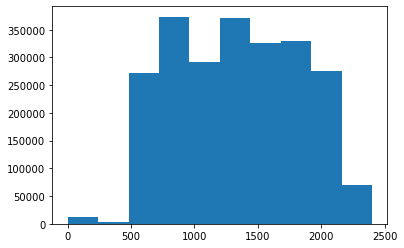

In [20]:
plt.hist(flights['DEPARTURE_TIME'])